### Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

### Loading Dataset

In [2]:
file_path = 'Unemployment-in-India.csv'
df = pd.read_csv(file_path)

### Data Preprocessing

In [3]:
print(df.isnull().sum()) 

df_cleaned = df.fillna(method='ffill')

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

Region                                      14
Date                                        14
Frequency                                   14
Estimated Unemployment Rate (%)             14
Estimated Employed                          14
Estimated Labour Participation Rate (%)     14
Area                                        14
Unnamed: 7                                 754
Unnamed: 8                                 754
Unnamed: 9                                 754
Unnamed: 10                                754
Unnamed: 11                                754
Unnamed: 12                                754
Unnamed: 13                                754
Unnamed: 14                                754
Unnamed: 15                                754
Unnamed: 16                                754
Unnamed: 17                                754
Unnamed: 18                                754
Unnamed: 19                                754
Unnamed: 20                                754
Unnamed: 21  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5880\3949502215.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill')


### Exploratory Data Analysis (EDA):

                                Date  Estimated Unemployment Rate (%)  \
count                            754                       754.000000   
mean   2019-12-16 11:50:27.055703040                        11.660796   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.692500   
50%              2019-12-15 12:00:00                         8.135000   
75%              2020-03-31 00:00:00                        15.720000   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.661370   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.540000e+02                               754.000000   
mean         7.464805e+06                                42.589456   
min          4.942000e+04                                13.330000   
25%          1.227446e+06                                38.16

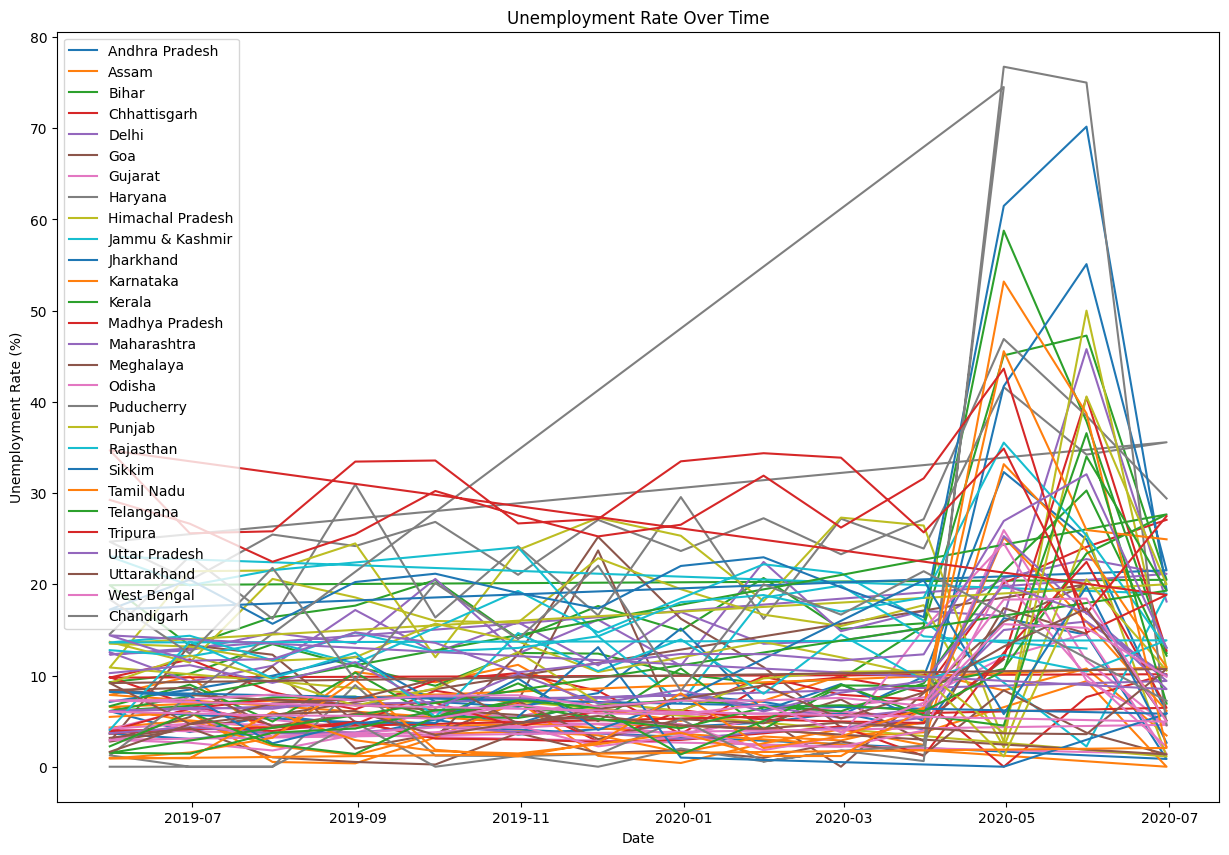

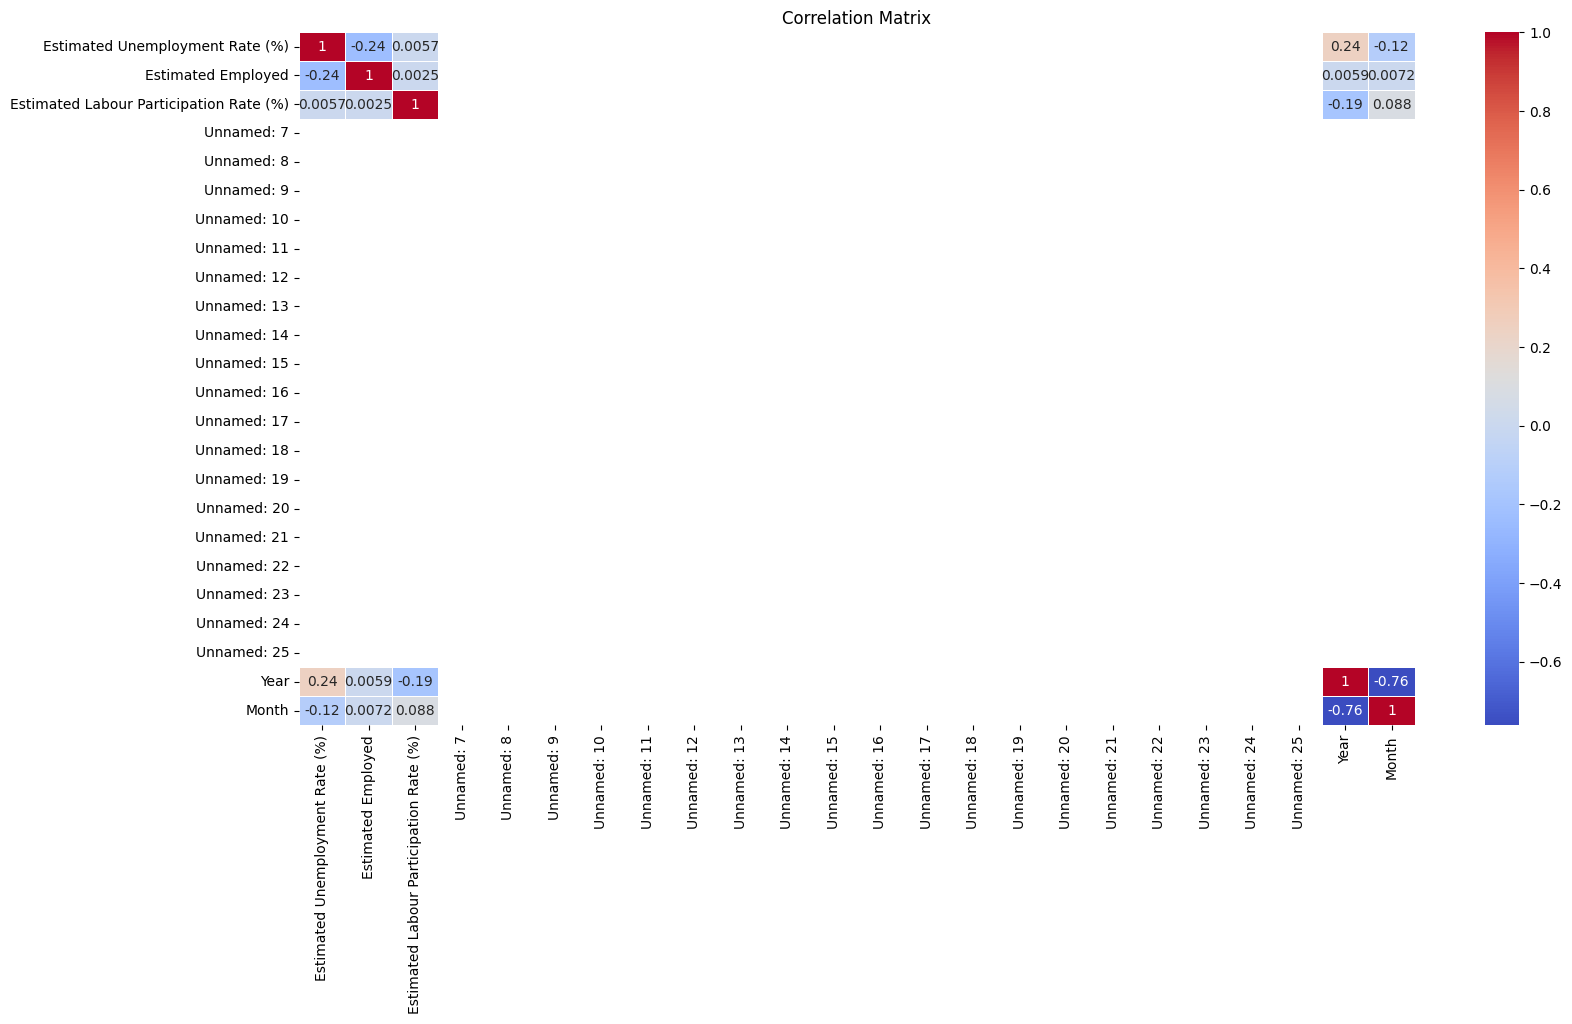

In [17]:
# Summary Statistics
print(df_cleaned.describe())

# Visualizations
plt.figure(figsize=(15, 10))
for region in df_cleaned['Region'].unique():
    region_data = df_cleaned[df_cleaned['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()

# Selecting only numerical columns for correlation
numerical_df = df_cleaned.select_dtypes(include=['float', 'int']) 

plt.figure(figsize=(18, 9))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Preparing the model

In [19]:
X = df_cleaned[['Year', 'Month']]
y = df_cleaned['Estimated Unemployment Rate (%)']

print(f'Number of samples: {len(X)}')

if len(X) < 10:
    test_size = 0.1  
else:
    test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Number of samples: 754
Mean Absolute Error: 6.664428993418558
Root Mean Squared Error: 9.144104568096827


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Result and Interpretation

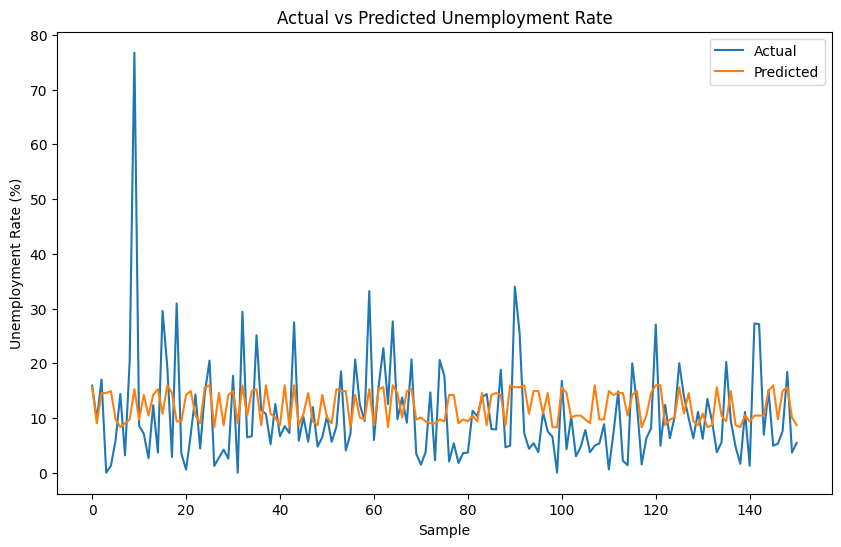

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Unemployment Rate (%)')
plt.title('Actual vs Predicted Unemployment Rate')
plt.legend()
plt.show()